In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', None) # displays all columns in dfs
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # no more warnings 

# 1.07 Activity 1
Refer to the files_for_activities/regression_data1.csv file. (The same file used in the class example.)


### Draw a box plot for the IC2.


In [2]:
df = pd.read_csv("/Users/kt/Desktop/Ironhack/unit-1/week-2/data_1.07_activities/files_for_activities/csv_files/regression_data1.csv")

df.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


<AxesSubplot:xlabel='IC2'>

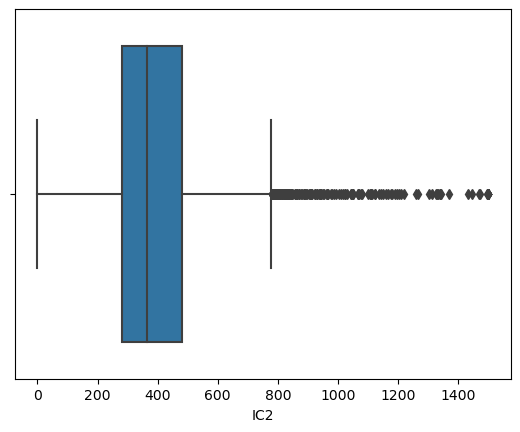

In [3]:
# draw box plot of IC2 

sns.boxplot(x=df['IC2']) 

### Print the descriptive statistics for IC2.


In [4]:
df['IC2'].describe()

count    4843.000000
mean      401.913690
std       182.660078
min         0.000000
25%       283.000000
50%       366.000000
75%       481.000000
max      1500.000000
Name: IC2, dtype: float64

### Remove the outliers from the column IC2.


<AxesSubplot:xlabel='IC2'>

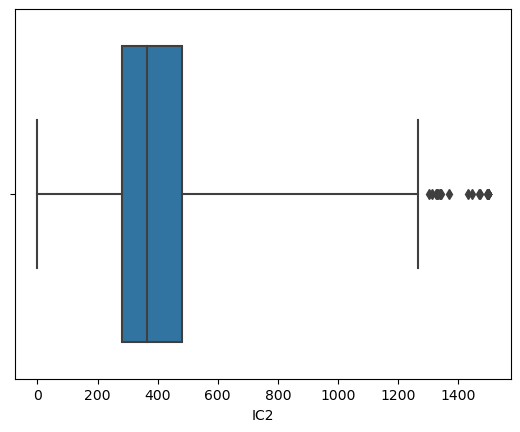

In [5]:
# change the upper limit 

sns.boxplot(x=df['IC2'], whis = 4) # whis is the parameter to choose your threshold, standard is 1.5

In [6]:
# find IQR

iqr = stats.iqr(df['IC2'], interpolation = 'midpoint')
iqr

198.0

In [7]:
# define the limits
upper_limit = np.percentile(df['IC2'],75) + 4*iqr
lower_limit = np.percentile(df['IC2'],25) - 4*iqr
lower_limit, upper_limit

(-509.0, 1273.0)

In [8]:
# check, how many are the outliers

len(df[(df['IC2'] < lower_limit) | (df['IC2'] > upper_limit)])

27

In [9]:
# total rows in original data

len(df)

4843

In [10]:
# remove them from the data

df = df[(df['IC2']>lower_limit) & (df['IC2']<upper_limit)]
len(df)

4816

# 1.07 Activity 2
Keep using the same file.



Repeat the process(log transformation) for the column IC3. Define the function again yourself.


In [11]:
# prepare new data frame for doing transformation

df2 = df.copy()

<AxesSubplot:xlabel='IC3', ylabel='Density'>

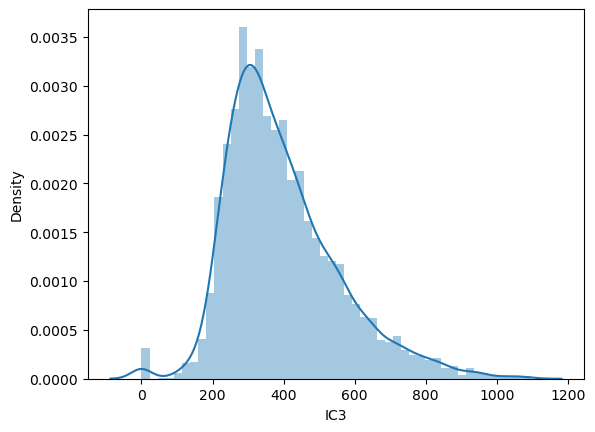

In [12]:
# check distribution of IC3 befor transform data

sns.distplot(df2['IC3'])

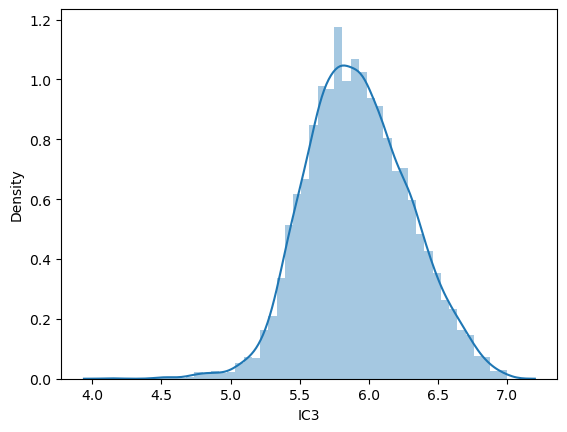

In [13]:
# do log transformation 

def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN 

df2['IC3'] = list(map(log_transfom_clean, df2['IC3']))

df2['IC3'] = df2['IC3'].fillna(np.mean(df2['IC3']))



# get a new graph
sns.distplot(df2['IC3'])
plt.show()

In [14]:
df2['IC3'].describe()

count    4816.000000
mean        5.921500
std         0.370375
min         4.143135
25%         5.662960
50%         5.906722
75%         6.171701
max         6.998510
Name: IC3, dtype: float64

<AxesSubplot:xlabel='IC3'>

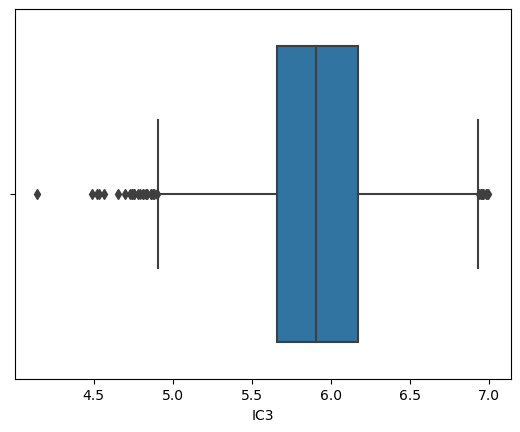

In [15]:
# Remove the tails of the transformed column to make it closer to the normal distribution. 
# This time change the factor from 1.5 to 3 when calculating the upper limit and the lower limit. 
# Check the distribution plot. Does it remove the tails effectively? If not change the factor back to 1.5 and see the results.

sns.boxplot(df2['IC3'])

In [16]:
# define the limits

iqr2 = stats.iqr(df2['IC3'], interpolation = 'midpoint')  # find IQR
iqr2

upper_limit = np.percentile(df2['IC3'],75) + 1.5*iqr2
lower_limit = np.percentile(df2['IC3'],25) - 1.5*iqr2
lower_limit, upper_limit

(4.899850304223493, 6.934810773323369)

In [17]:
# check, how many are the outliers

len(df2[(df2['IC3'] < lower_limit) | (df2['IC3'] > upper_limit)])

33

In [18]:
# remove them from the data

df2 = df2[(df2['IC3']>lower_limit) & (df2['IC3']<upper_limit)]
len(df2)

4783

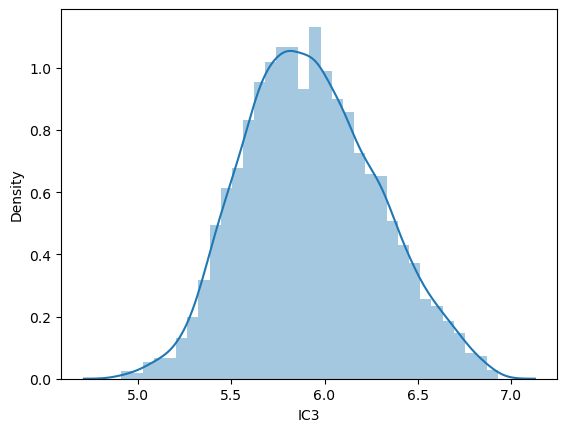

In [19]:
# get a new graph
sns.distplot(df2['IC3'])
plt.show()

# 1.07 Activity 3
Repeat the same steps for column IC5 for box-cox transformation.

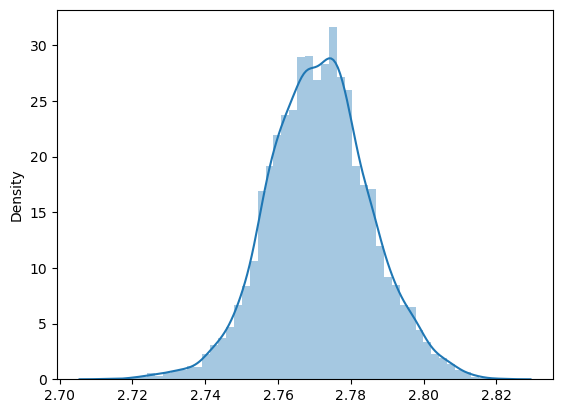

In [40]:
# filter out negative values:
df2['IC5'] = np.where(df2['IC5']<=0, np.NAN, df2['IC5']) 

# replace it with the mean of the column
df2['IC5'] = df2['IC5'].fillna(df2['IC5'].mean())

transformed_data, _ci = stats.boxcox(df2['IC5'])

sns.distplot(transformed_data)
plt.show()

<AxesSubplot:>

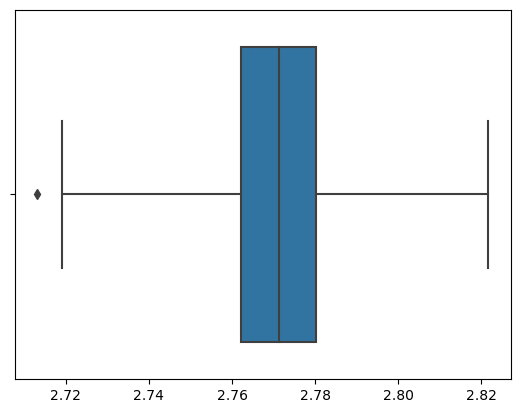

In [41]:
# visualize outliers 
sns.boxplot(transformed_data, whis=2.5)

In [46]:
# define the limits

iqr3 = stats.iqr(transformed_data, interpolation = 'midpoint')  # find IQR

# find upper & lower limits
upper_limit = np.percentile(transformed_data,75) + 2*iqr3
lower_limit = np.percentile(transformed_data,25) - 2*iqr3

# check, how many are the outliers
len(transformed_data[(transformed_data < lower_limit) | (transformed_data > upper_limit)])

12

In [47]:
# remove outliers from the data

transformed_data = transformed_data[(transformed_data>lower_limit) & (transformed_data<upper_limit)]
len(transformed_data)

4771

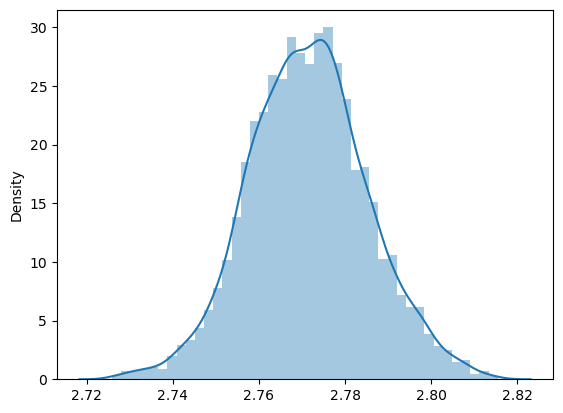

In [48]:
# get a new graph
sns.distplot(transformed_data)
plt.show()

# 1.07 Activity 4
Keep using the same file (files_for_activities/regression_data.csv) for this exercise.



In [51]:
# Load data regression_data.csv.

df4 = pd.read_csv("/Users/kt/Desktop/Ironhack/unit-1/week-2/data_1.07_activities/files_for_activities/csv_files/regression_data1.csv")

df4.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


In [56]:
# Select 3 numeric columns.
df4 = df[["IC1", "AVGGIFT", "TARGET_D"]]
df4.head()

,IC1,AVGGIFT,TARGET_D
0,420,15.500000,21.0
1,350,3.080000,3.0
2,469,7.500000,20.0
3,148,6.700000,5.0
4,174,8.785714,10.0


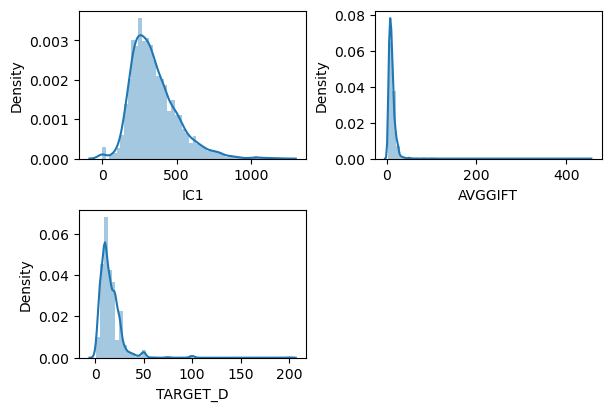

In [60]:
# Plot distributions.

enum_x = list(enumerate(df4, start = 1)) # enumerate adds a counter to an iterable and returns in it as the enumerate objec
                                            # put the enumerate objec into another object (as a list), to be able to reuse again

# plot them
plt.figure(figsize = (6, 4), constrained_layout = True)

for i in enum_x:
    plt.subplot(2, 2, i[0]) # create multi-plot, using subplot, 2 rows, 2 cols, sequence of plot (iterate through enum_x)
    sns.distplot(df4[(i[1])])
    

In [63]:
# Normalize.

from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(df4) ### USE MINMAX FOR NORMALIZING
df4_minmax = transformer.transform(df4) #This is a an array of arrays
df4_minmax.shape


(4816, 3)

In [64]:
# put normalized data into a new data frame

df4_norm = pd.DataFrame(df4_minmax, columns=df4.columns)
df4_norm.head() 

,IC1,AVGGIFT,TARGET_D
0,0.345964,0.029569,0.100503
1,0.288303,0.001829,0.010050
2,0.386326,0.011701,0.095477
3,0.121911,0.009915,0.020101
4,0.143328,0.014573,0.045226


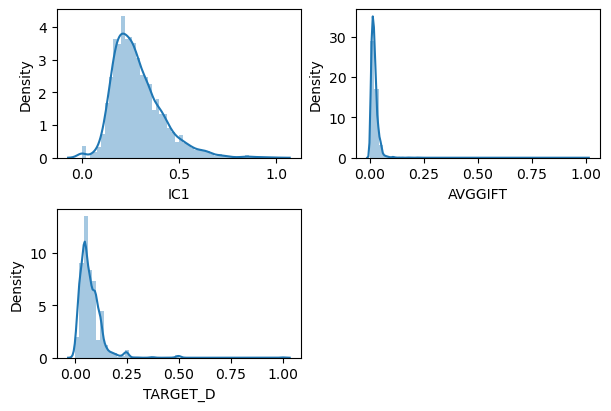

In [65]:
# Plot new distributions.


enum_a = list(enumerate(df4_norm, start = 1)) # enumerate adds a counter to an iterable and returns in it as the enumerate objec
                                        # put the enumerate objec into another object (as a list), to be able to reuse again

# plot them
plt.figure(figsize = (6, 4), constrained_layout = True)

for i in enum_a:
    plt.subplot(2, 2, i[0]) # create multi-plot, using subplot, 2 rows, 2 cols, sequence of plot (iterate through enum_a)
    sns.distplot(df4_norm[(i[1])])
    
